# Mejoramiento de imagen a color

1. Tomar la imagen a color

2. Convertir RGB a HSV

3. Ecualizar sólo el canal H

4. Convertir el nuevo HSV a RGB


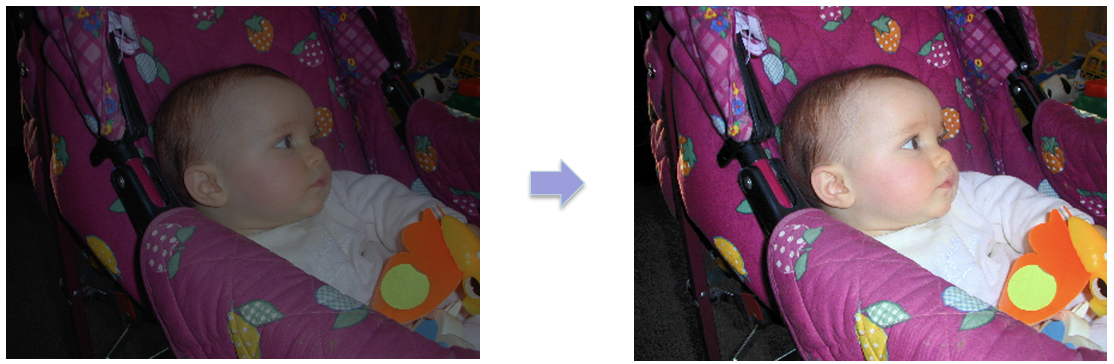

In [ ]:
!wget https://www.dropbox.com/s/fp7xaj54ue9oomc/valeria.png?dl=0

--2021-11-30 13:11:03--  https://www.dropbox.com/s/luqjakj3nc63ldb/valeria.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/luqjakj3nc63ldb/valeria.png [following]
--2021-11-30 13:11:04--  https://www.dropbox.com/s/raw/luqjakj3nc63ldb/valeria.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc051b01cf482357666bff13ee30.dl.dropboxusercontent.com/cd/0/inline/Ba8eLqafbkd2sM5ttKRW5FztjSXjBdq6_pWfbc6JlzKhfjVnoDGi55yzRrZV6ZY30KHEo4lYwOKpejfH-QCU49w_nN1lK0VmWytMeZspr_OSt9fsGTAlU497_C2ukmu8Qps7b9XLG-etN9nDnmm3Emel/file# [following]
--2021-11-30 13:11:04--  https://uc051b01cf482357666bff13ee30.dl.dropboxusercontent.com/cd/0/inline/Ba8eLqafbkd2sM5ttKRW5FztjSXjBdq6_pWfbc6JlzKhfjVnoDGi55yzRrZV6ZY30KHEo4lYwOKpejfH-QCU49w_nN

In [1]:
def imhist3(X):
  (N,M,P) = X.shape
  n = 256
  for p in range(3):
    h = np.zeros((256,))
    for i in range(N):
      for j in range(M):
        x = X[i,j,p]
        h[x] = h[x]+1
    plt.figure(figsize=(30,9))
    plt.bar(range(n),h[0:n])
    plt.title('channel '+str(p))
    plt.show()


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Imagen original (oscura)

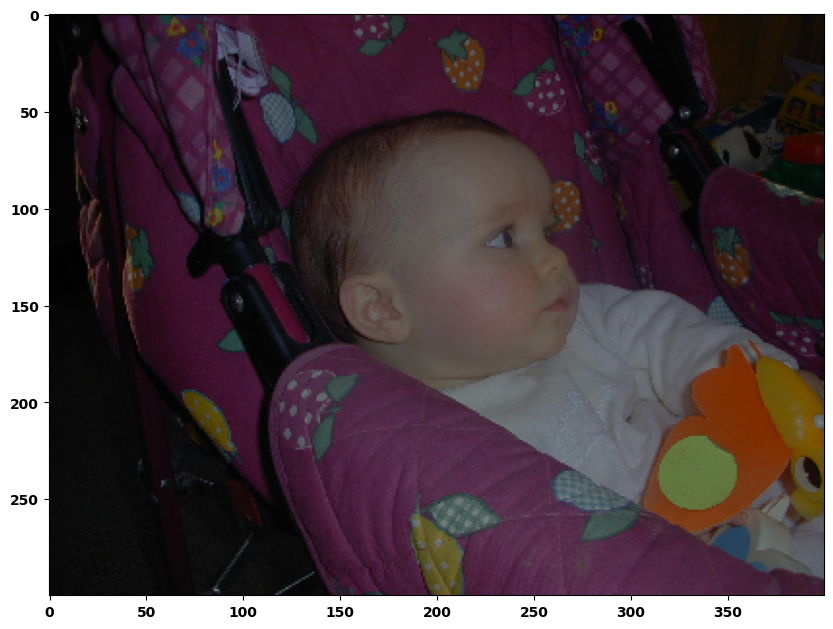

In [3]:
I = cv2.imread('valeria.png')
plt.figure(figsize=(10,12))
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.show()

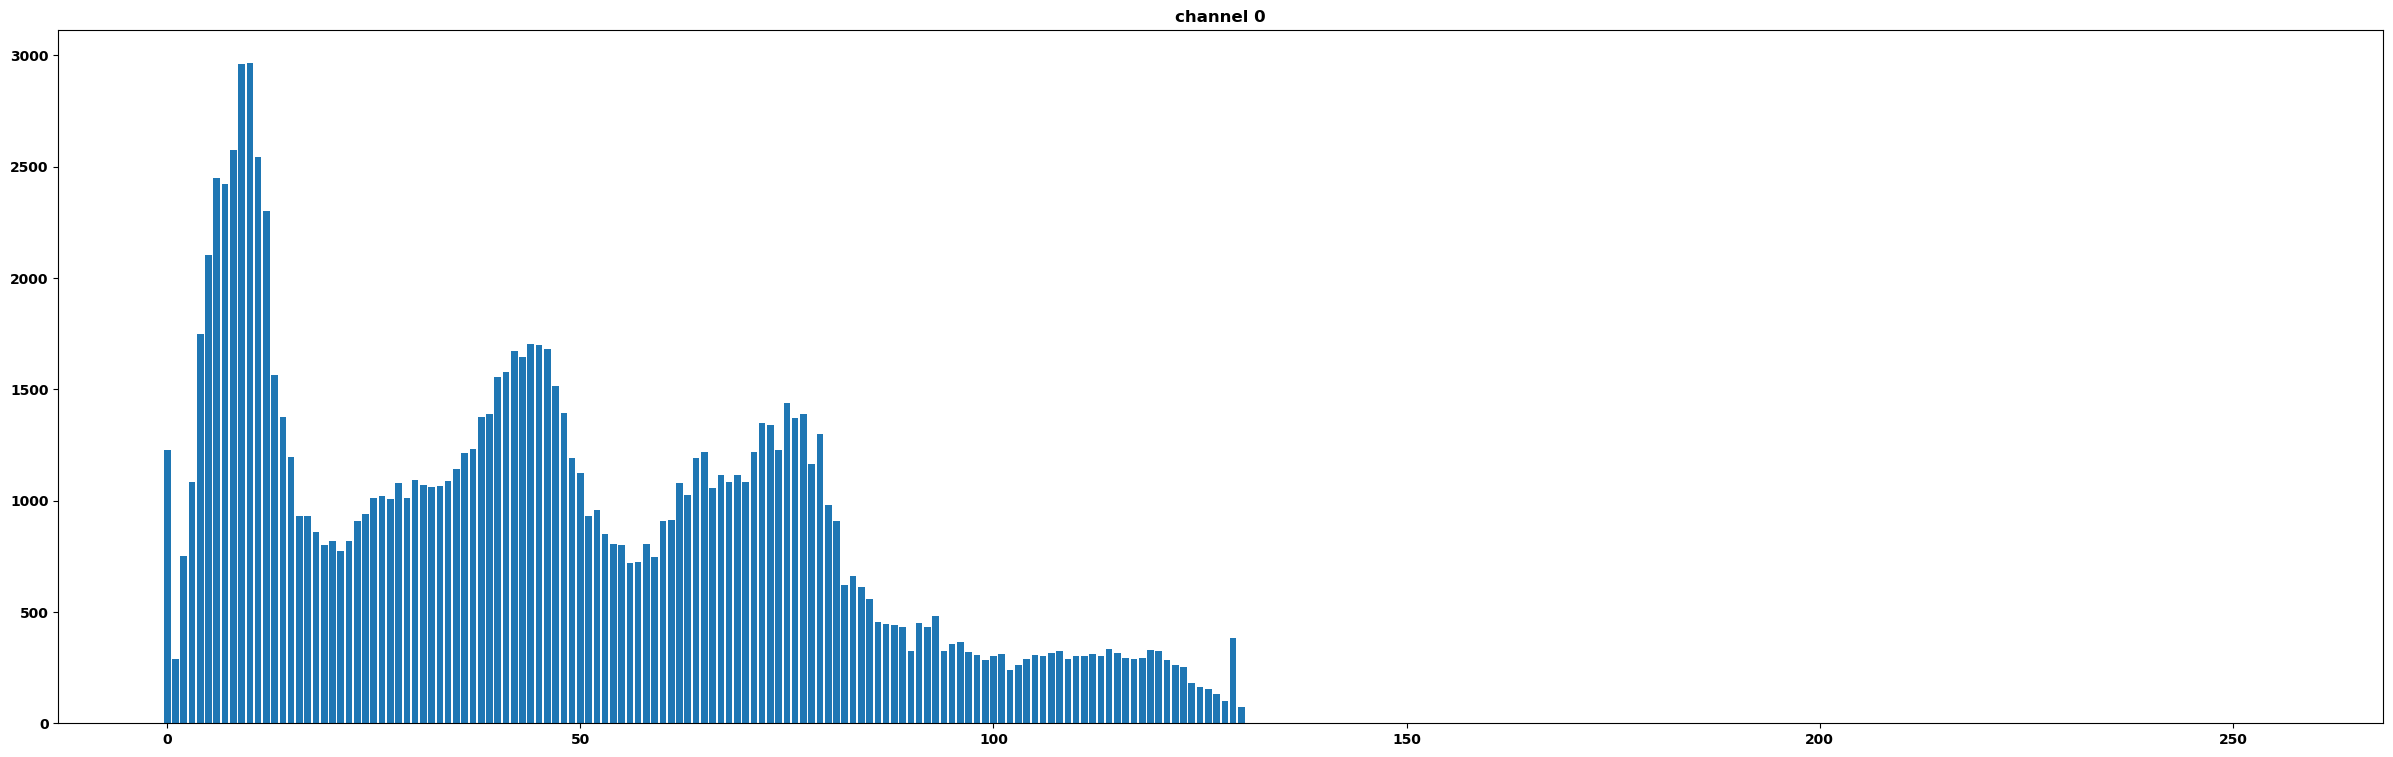

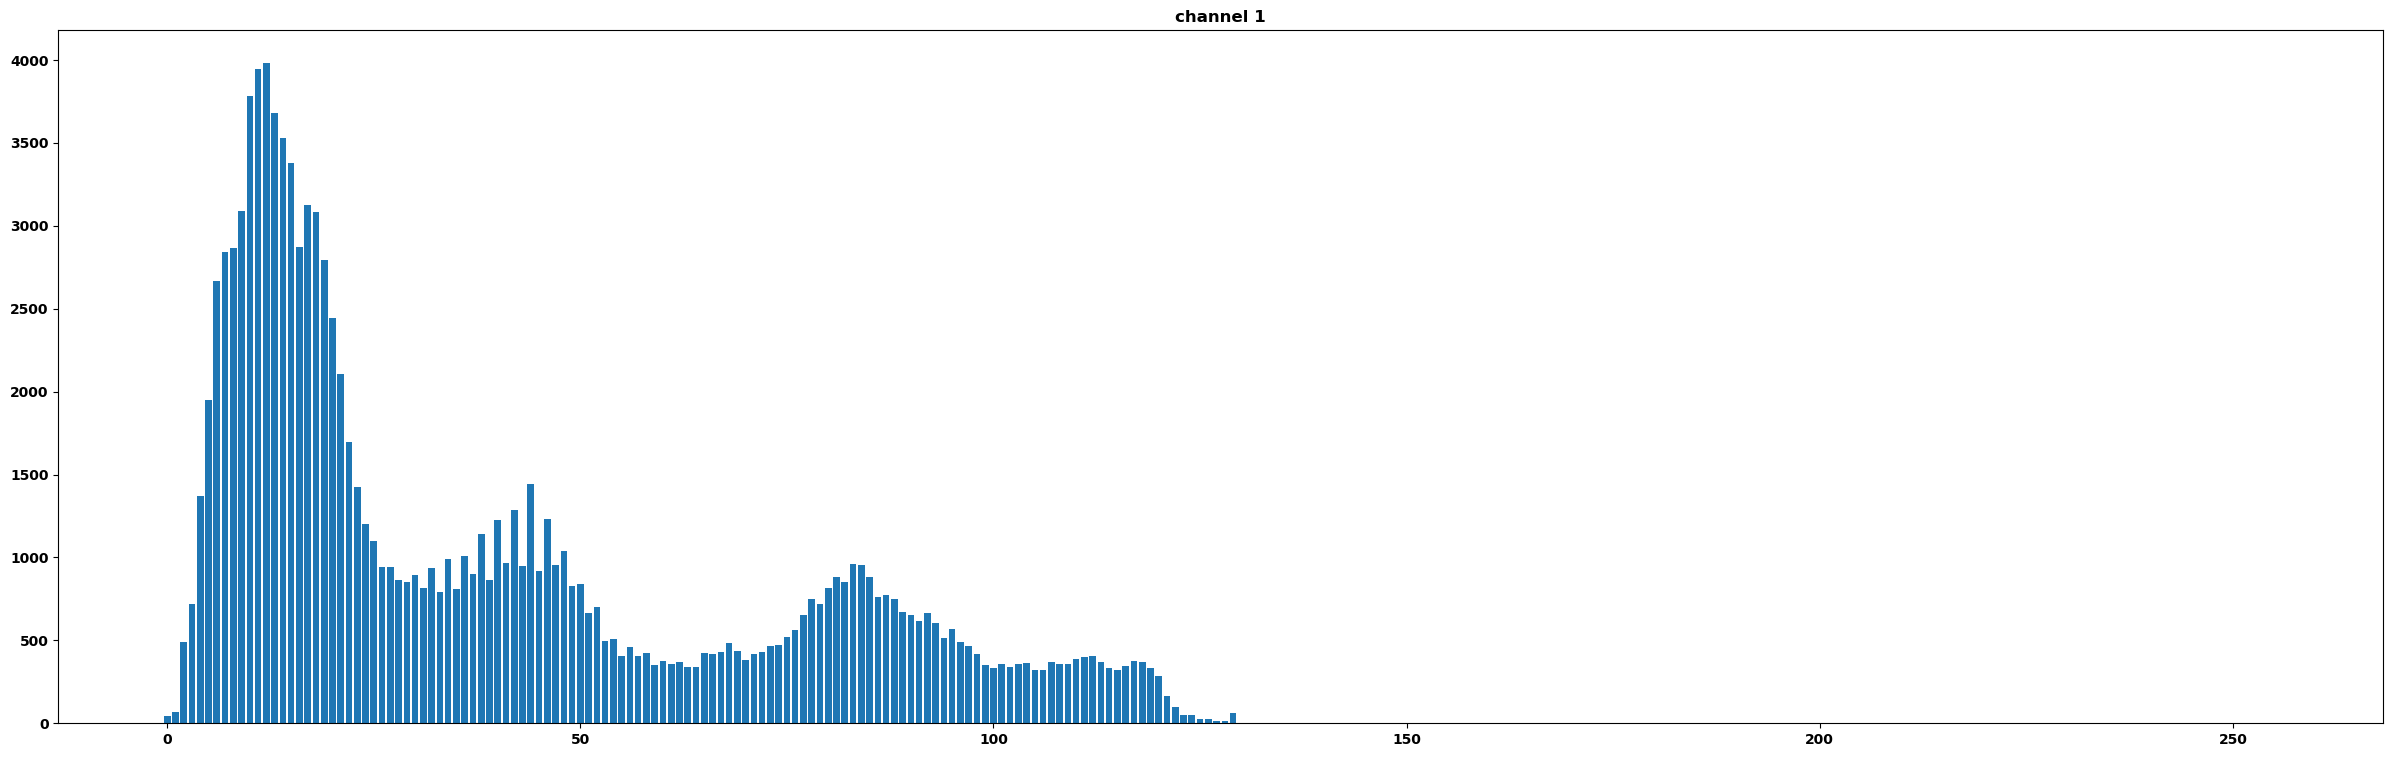

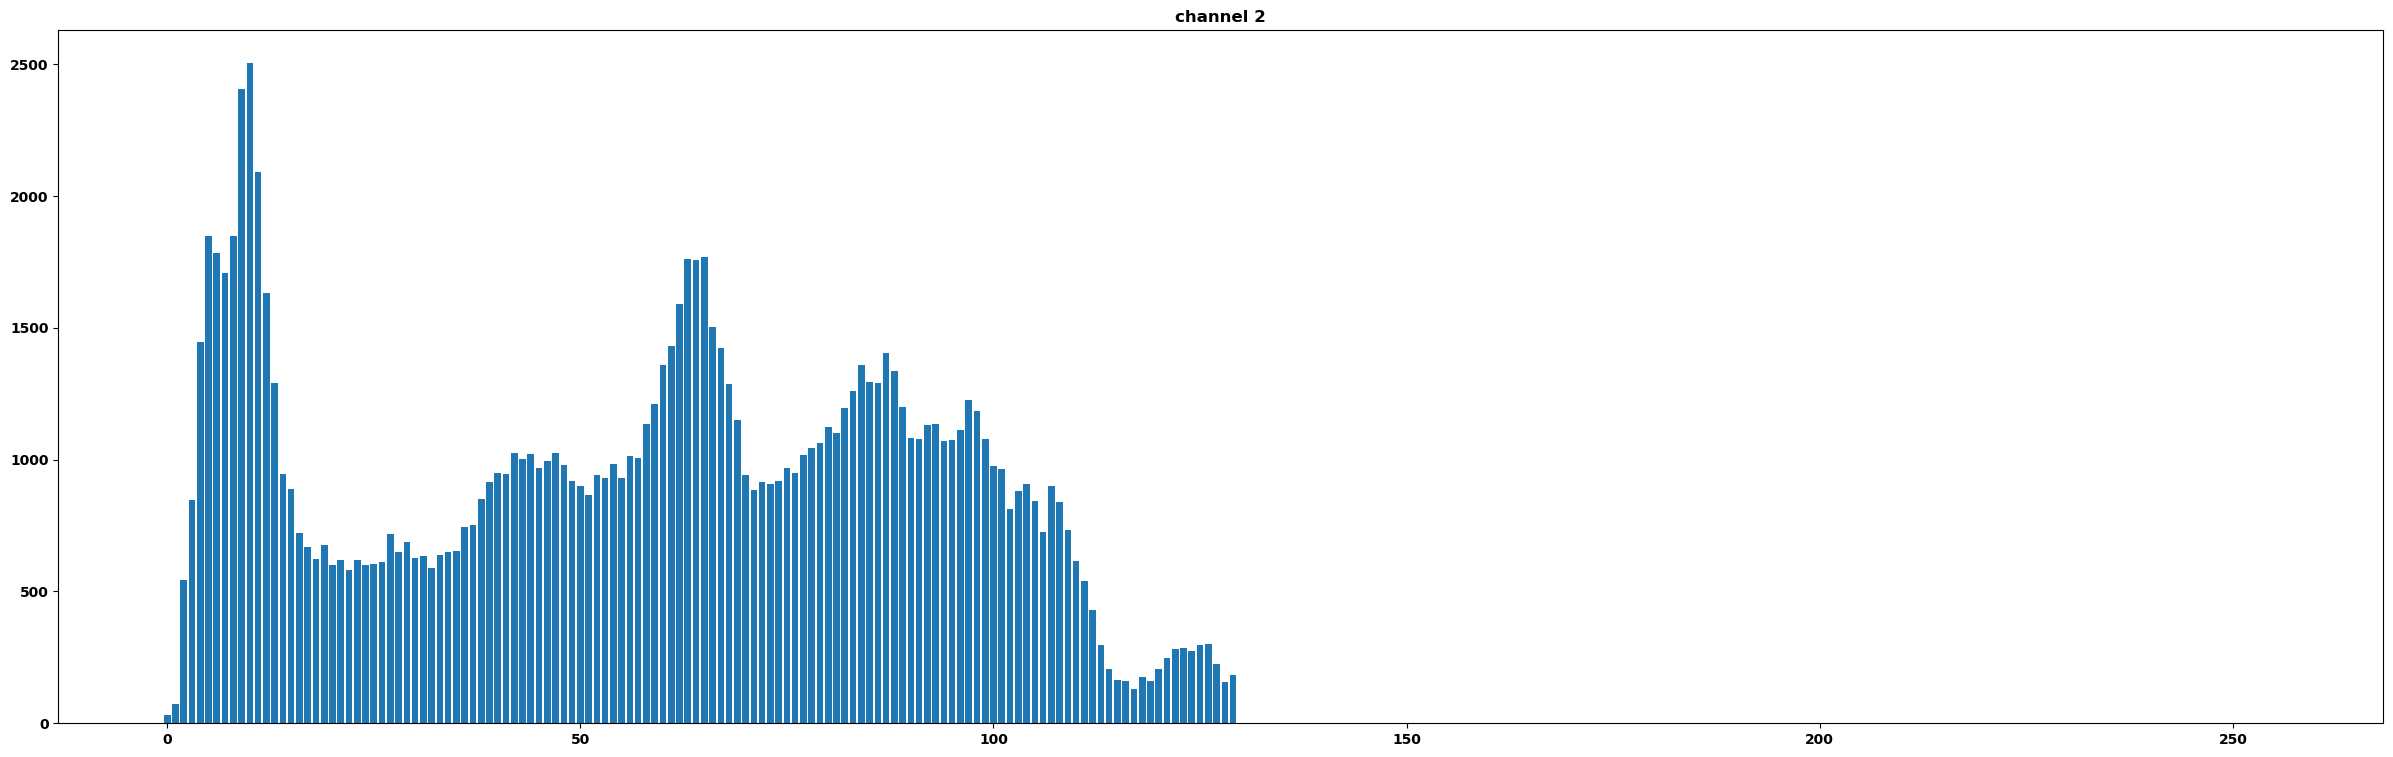

In [4]:
imhist3(I)

# Lo que no hay que hacer: ecualizar RGB

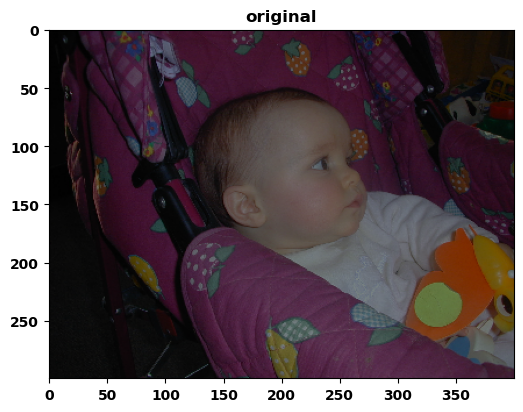

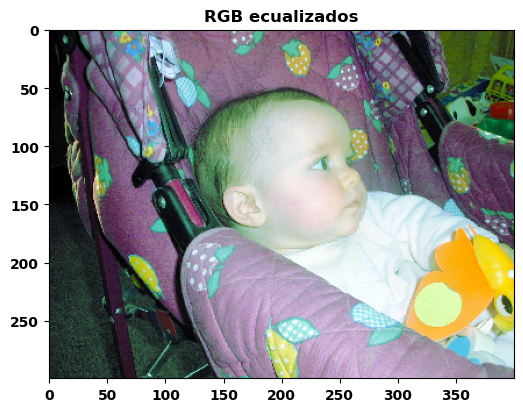

In [5]:
J = I.copy()
J[:,:,0] = cv2.equalizeHist(I[:,:,0])
J[:,:,1] = cv2.equalizeHist(I[:,:,1])
J[:,:,2] = cv2.equalizeHist(I[:,:,2])
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.show()
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(J, cv2.COLOR_BGR2RGB))
plt.title('RGB ecualizados')
plt.show()

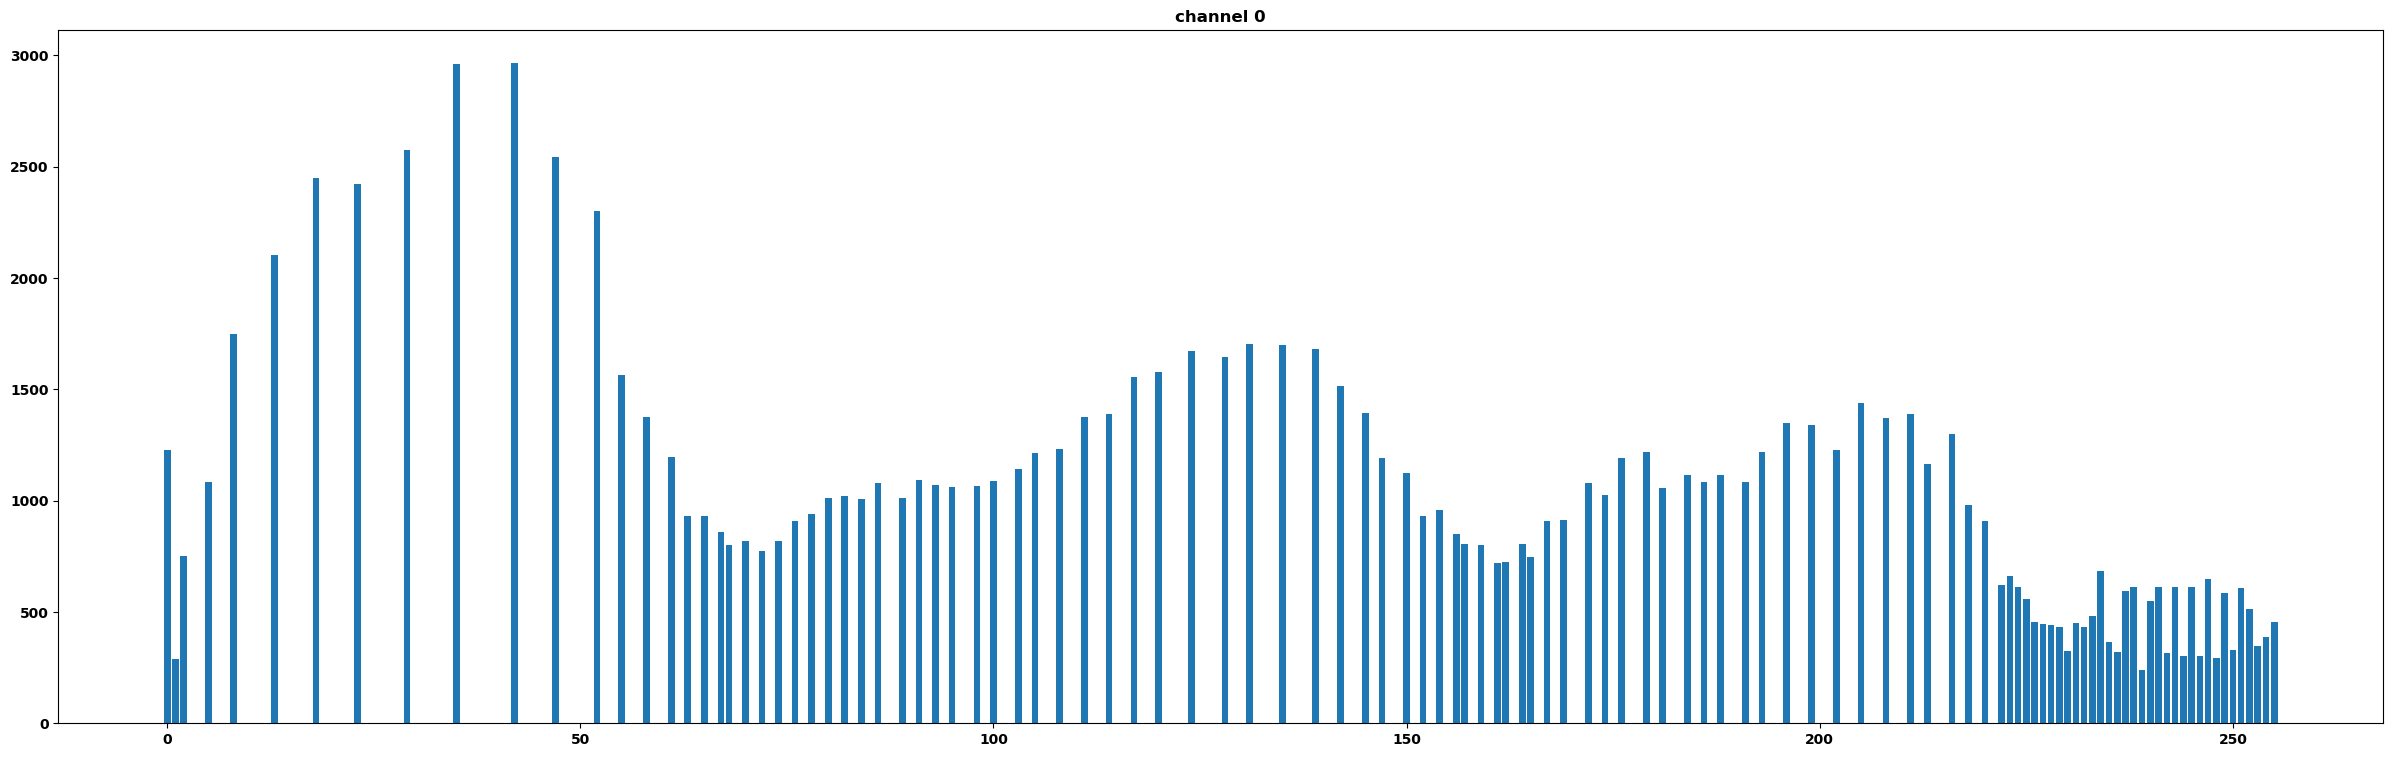

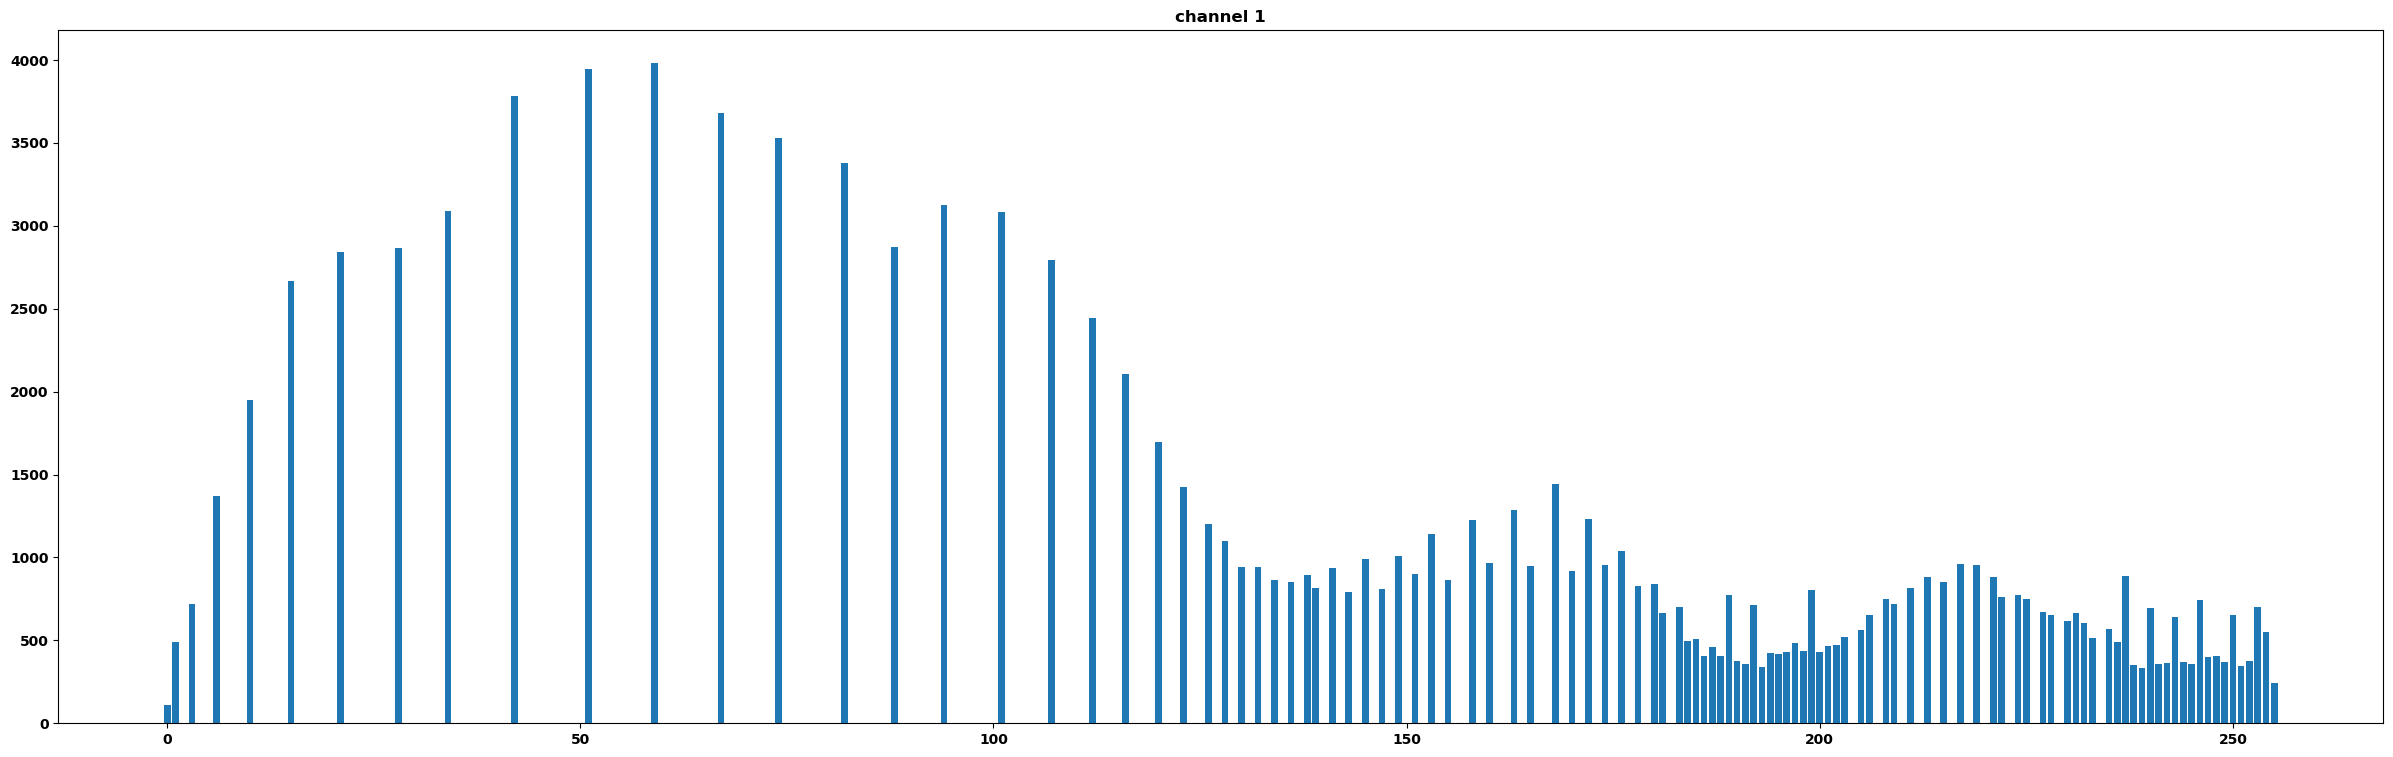

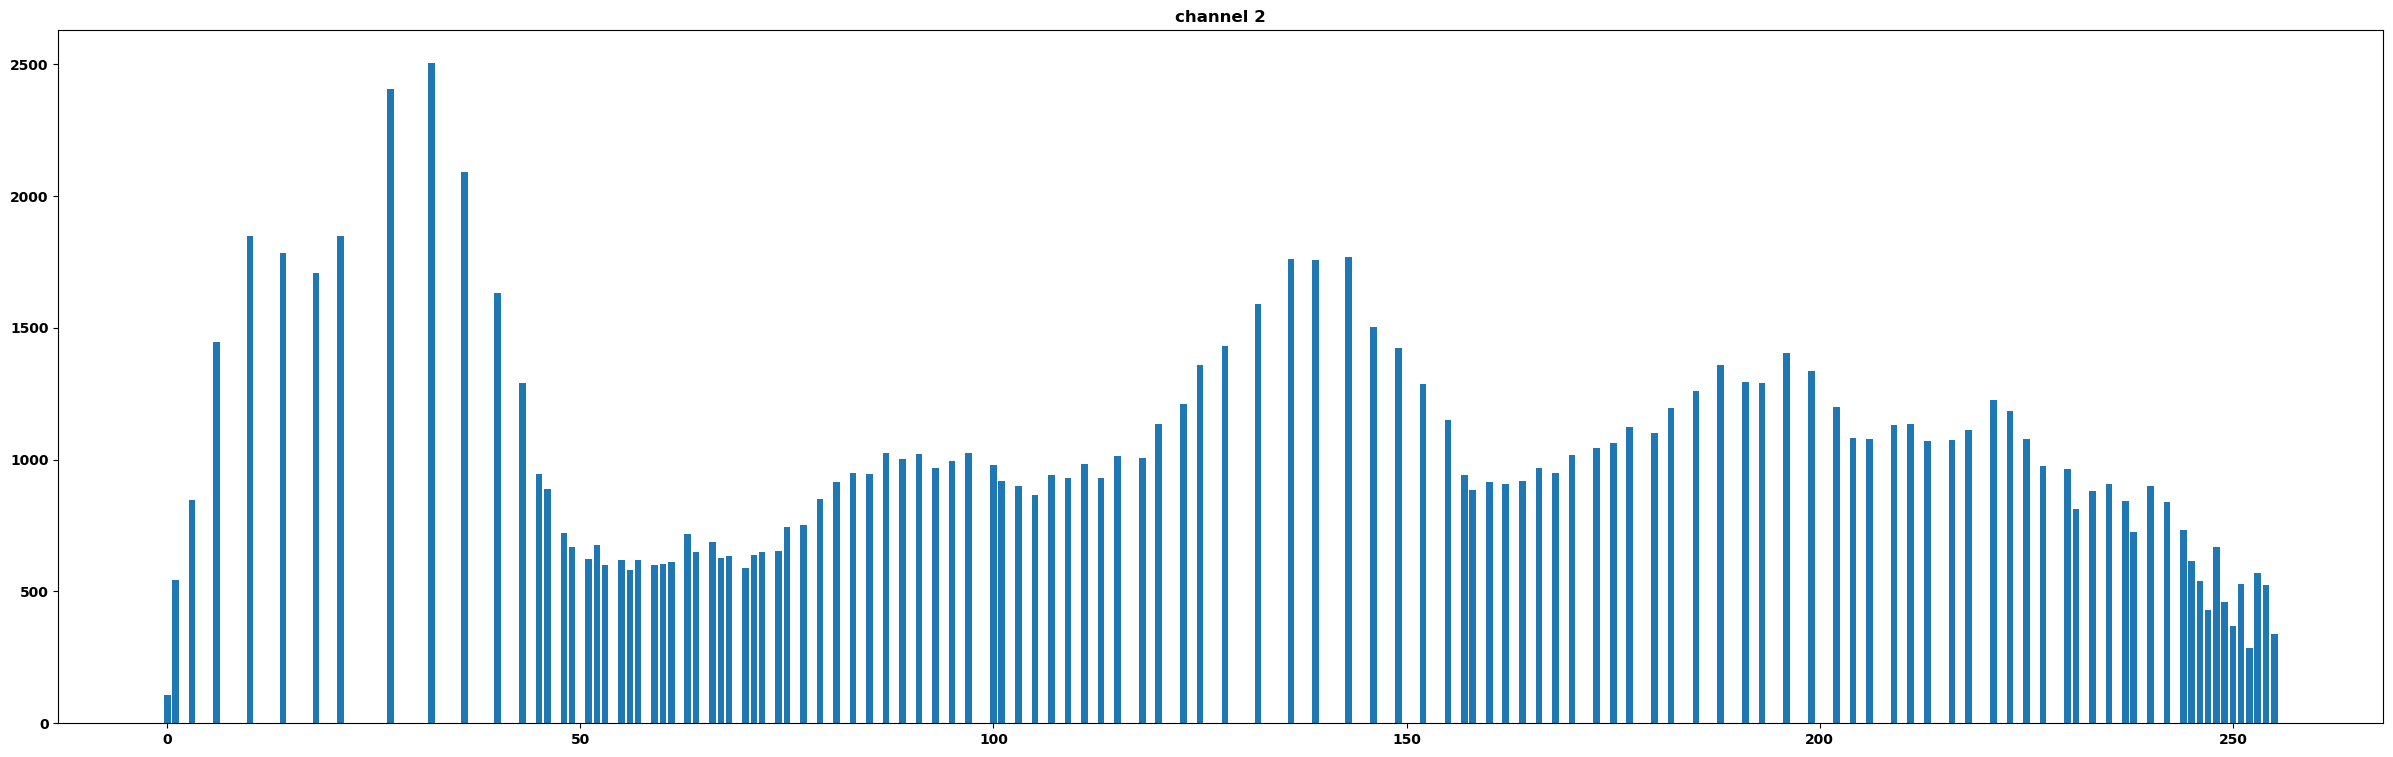

In [6]:
imhist3(J)

# Lo que sí hay que hacer: ecualizar canal V de HSV

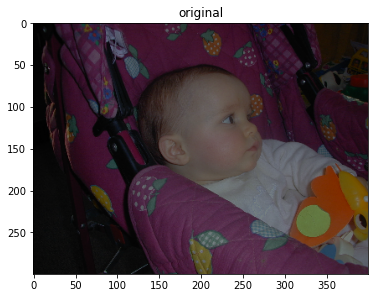

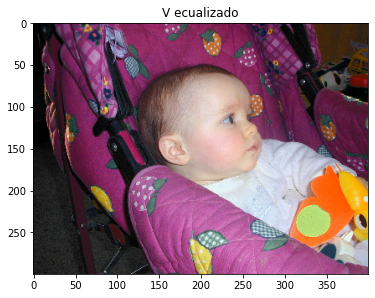

In [29]:
K = I.copy()
Khsv = cv2.cvtColor(K, cv2.COLOR_BGR2HSV)
Khsv[:,:,2] = cv2.equalizeHist(K[:,:,2])
Knew = cv2.cvtColor(Khsv, cv2.COLOR_HSV2BGR)
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.show()
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(Knew, cv2.COLOR_BGR2RGB))
plt.title('V ecualizado')
plt.show()

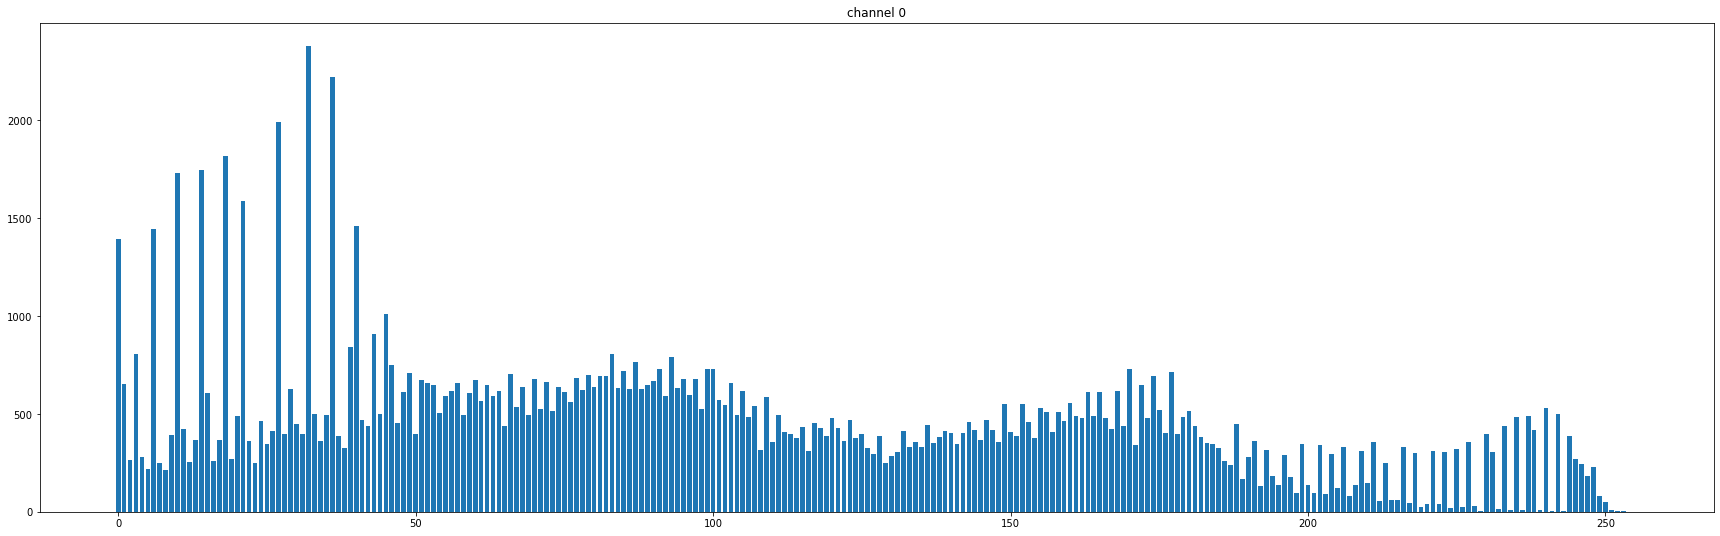

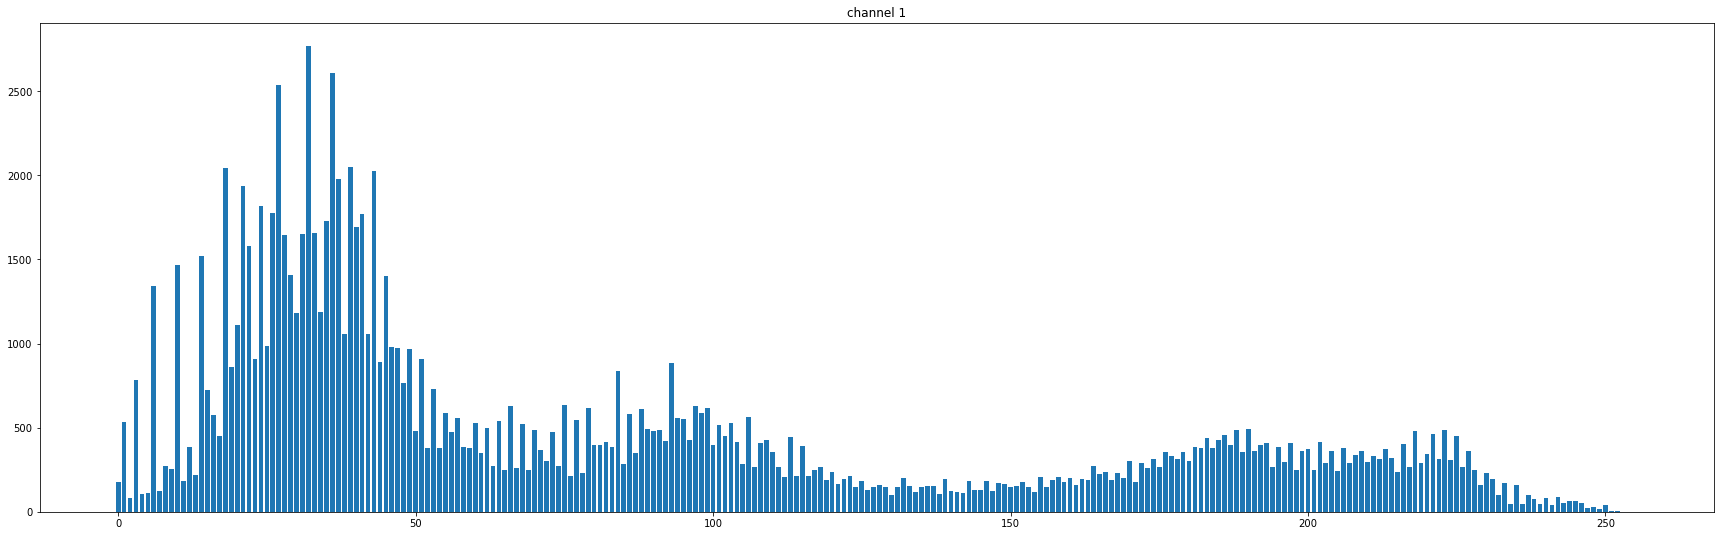

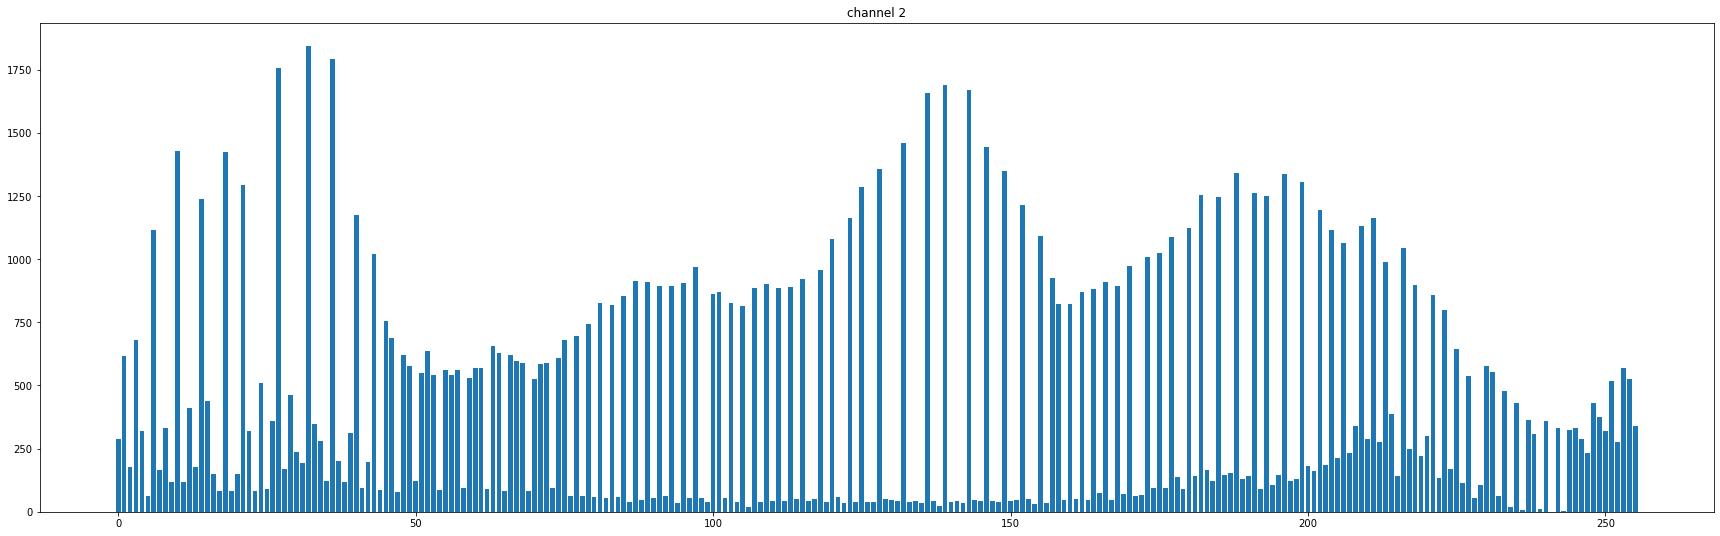

In [30]:
imhist3(Knew)

# Conversion a Lab

In [7]:
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(Knew, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.show()

lab_image = cv2.cvtColor(Knew, cv2.COLOR_BGR2LAB)

L,A,B = cv2.split(lab_image)

print(np.min(A))

plt.imshow(L,cmap='gray')
plt.title('L: luminosidad (gris)')
plt.show()

plt.imshow(A,cmap='gray')
plt.title('A: de verde a rojo')
plt.show()

plt.imshow(B,cmap='gray')
plt.title('B: de azul a amarillo')
plt.show()


NameError: name 'Knew' is not defined

<Figure size 600x900 with 0 Axes>